In [1]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

[nltk_data] Downloading package punkt to /home/pedrox/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pedrox/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /home/pedrox/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [2]:
!pip install pandas
import pandas as pd
df = pd.read_csv('./data_cleaning.csv',sep=';')
#df = df.drop(columns=['index'])
df["ncm"] = df["ncm"].astype(str)
for i in range(len(df)):
  if len(df["ncm"].iloc[i]) < 8:
    df["ncm"].iloc[i] = "0"+ df["ncm"].iloc[i]
df['ncm'] = df['ncm'].astype(str).str[:2]
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

/home/pedrox/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='ncm'>

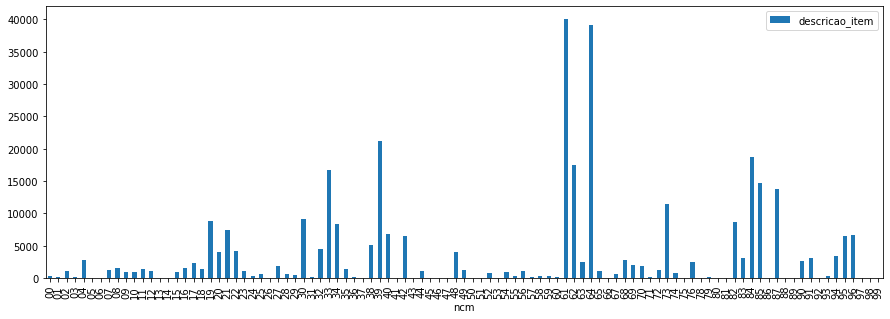

In [3]:
!pip install matplotlib
import matplotlib.pyplot as plt
df_group = df.groupby('ncm').count()
df_group
df_group.plot.bar( figsize=(15, 5))

In [4]:
over5000 = []
median = []
less1000 = []

for i in range(len(df_group)):
    if df_group['descricao_item'].iloc[i] > 5000:
        over5000.append(df_group['descricao_item'].index[i])
    elif df_group['descricao_item'].iloc[i] < 1000:
        less1000.append(df_group['descricao_item'].index[i])
    else:
        median.append(df_group['descricao_item'].index[i])

In [5]:
print(f"acima de 5000 amostras {len(over5000)}\nentre 5000 e 1000 {len(median)}\nabaixo de 1000 {len(less1000)}")


acima de 5000 amostras 19
entre 5000 e 1000 31
abaixo de 1000 49


In [6]:
len(df)

343240

In [7]:
#DROP menores que 1000
for i in less1000:
   df.drop(df.loc[df['ncm'] == i].index, inplace=True)

In [8]:
len(df)

333003

In [9]:
import pandas as pd
import numpy as np


for i in over5000: 
    remove_n = len(df.loc[df['ncm'] == i ]) - 5000
    remove_class = i
    # Here you first find the indexes where class is equal to the class you want to drop.
    #Then you slice only the first n indexes of this class
    index_to_drop = df.index[df['ncm'] == remove_class][:remove_n]
    #Finally drop those indexes
    df = df.drop(index_to_drop)

In [10]:
df = df.reset_index()
df

,index,descricao_item,ncm
0,5,DISPLAY TOTEN PS MARLUVAS PES,49
1,16,OIL E7 15W GRANEL DEP,27
2,23,CS K BB CS TINTA 2L PRETA,32
3,48,KIT DE PROTECAO INFANTIL CAPITAO ESTRELA TAM...,65
4,68,Livro IM Interativo Coreldraw x,49
...,...,...,...
160960,343242,ZIN E MAQUINA DO VIDRO ESQUERDA PINO ALTO,87
160961,343243,"ZINCO 100CM 3,50KG P MT CP",72
160962,343244,ZMM 9010811 ALTERNADOR 12V AMP,85
160963,343245,ZORDS COM FIGURA E,95


In [11]:
df = df.drop(columns=['index'])

<AxesSubplot:xlabel='ncm'>

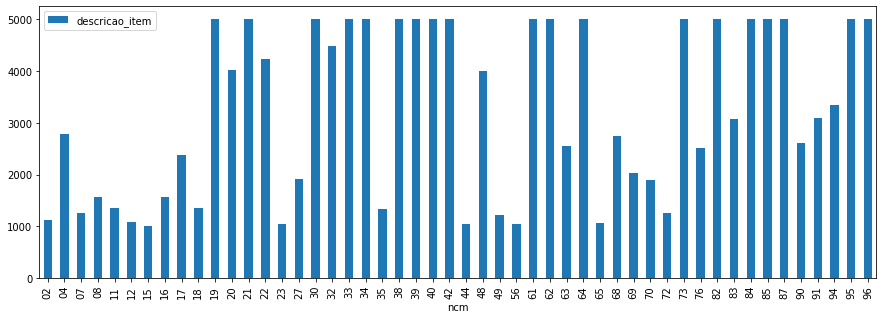

In [12]:
df_group_nw = df.groupby('ncm').count()
df_group_nw
df_group_nw.plot.bar( figsize=(15, 5))

In [13]:
palavras_final = []
for i in range(len(df['descricao_item'])): 
    produto = df['descricao_item'].iloc[i]
    from string import punctuation
    sentencas = nltk.sent_tokenize(produto)
    palavras = nltk.word_tokenize(produto.upper())
    stemmer = nltk.stem.RSLPStemmer()
    palavras_stem = []
    for palavra in palavras:
        palavras_stem.append(stemmer.stem(palavra))
    palavras_sem_stopwords = [palavras_stem for palavras_stem in palavras_stem if palavras_stem not in stopwords]
    palavra_final = ' '.join(palavras_sem_stopwords)
    palavras_final.append(palavra_final)
x = pd.Series(palavras_final)
df['descricao_item_clean'] = x

In [14]:
df.dropna()

,descricao_item,ncm,descricao_item_clean
0,DISPLAY TOTEN PS MARLUVAS PES,49,display toten ps marluv pe
1,OIL E7 15W GRANEL DEP,27,oil e7 15w granel dep
2,CS K BB CS TINTA 2L PRETA,32,cs k bb cs tint 2l pret
3,KIT DE PROTECAO INFANTIL CAPITAO ESTRELA TAM...,65,kit proteca infantil capita estrel tamanh unic...
4,Livro IM Interativo Coreldraw x,49,livr im inter coreldraw x
...,...,...,...
160960,ZIN E MAQUINA DO VIDRO ESQUERDA PINO ALTO,87,zin maquin vidr esquerd pin alt
160961,"ZINCO 100CM 3,50KG P MT CP",72,"zinc 100cm 3,50kg p mt cp"
160962,ZMM 9010811 ALTERNADOR 12V AMP,85,zmm 9010811 altern 12v amp
160963,ZORDS COM FIGURA E,95,zord figur


In [19]:
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

labels = df['ncm']
text = df['descricao_item_clean']

X_train, X_test, y_train, y_test = train_test_split(text, labels, random_state=0, test_size=0.2)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_transformed = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)

labels_enc = LabelEncoder()
y_train_labels_fit = labels_enc.fit(y_train)
y_train_lables_trf = labels_enc.transform(y_train)

#print(labels.classes_)

In [20]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
clf = linear_svc.fit(X_train_transformed,y_train)

In [ ]:
from sklearn import metrics
import numpy as np
y_test = y_test.astype(int)
p_count = count_vect.transform(list(X_test))
p_tfidf = tf_transformer.transform(p_count)
y_pred = clf.predict(p_tfidf)
y_pred = list(map(int, y_pred))
print(metrics.classification_report(y_test,y_pred))